In [9]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
import re

## Data Preprocessing

In [10]:
#Importing the dataset
data =pd.read_csv("C:/Users/vamsi/Downloads/Restaurant aspect based sentiment analysis/data/Restaurant reviews.csv")
# look the data set
data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [11]:
df = data[['Review','Rating']]
df = df.drop_duplicates(subset='Review', keep='first')


In [12]:
print(df.shape)
print(df.info())

(9365, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 9365 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  9364 non-null   object
 1   Rating  9365 non-null   object
dtypes: object(2)
memory usage: 219.5+ KB
None


In [13]:
df.dropna(inplace=True)
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [14]:
df.drop(df[df['Rating'] == 'Like'].index, inplace=True)


In [15]:
type(df['Rating'][0])

str

In [16]:
df['Rating'].value_counts()

Rating
5      3374
4      2297
1      1710
3      1163
2       675
4.5      69
3.5      47
2.5      19
1.5       9
Name: count, dtype: int64

In [17]:
df['Rating']=df['Rating'].astype(float)
df['Review']=df['Review'].str.lower()
df['Rating']=df['Rating'].round()

In [18]:
# look  describe data set
df["Rating"].describe()

count    9363.000000
mean        3.538075
std         1.488444
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

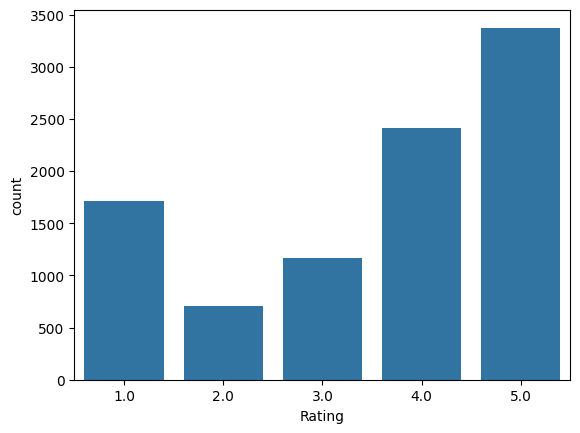

In [19]:
# how much percentage rating in the dataset

sns.countplot(x=df['Rating'])
plt.show()

In [20]:
percentage_rating = (df['Rating'].value_counts(normalize=True) * 100).round(2)
print('The percentage rating')
print(percentage_rating)

The percentage rating
Rating
5.0    36.04
4.0    25.77
1.0    18.26
3.0    12.42
2.0     7.51
Name: proportion, dtype: float64


In [21]:
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Rating,Length
0,"the ambience was good, food was quite good . h...",5.0,222
1,ambience is too good for a pleasant evening. s...,5.0,144
2,a must try.. great food great ambience. thnx f...,5.0,189
3,soumen das and arun was a great guy. only beca...,5.0,148
4,food is good.we ordered kodi drumsticks and ba...,5.0,160


In [22]:
df["Length"].describe().round(2)

count    9363.00
mean      297.02
std       341.89
min         1.00
25%       149.00
50%       198.00
75%       334.00
max      5212.00
Name: Length, dtype: float64

<Axes: xlabel='Rating', ylabel='Length'>

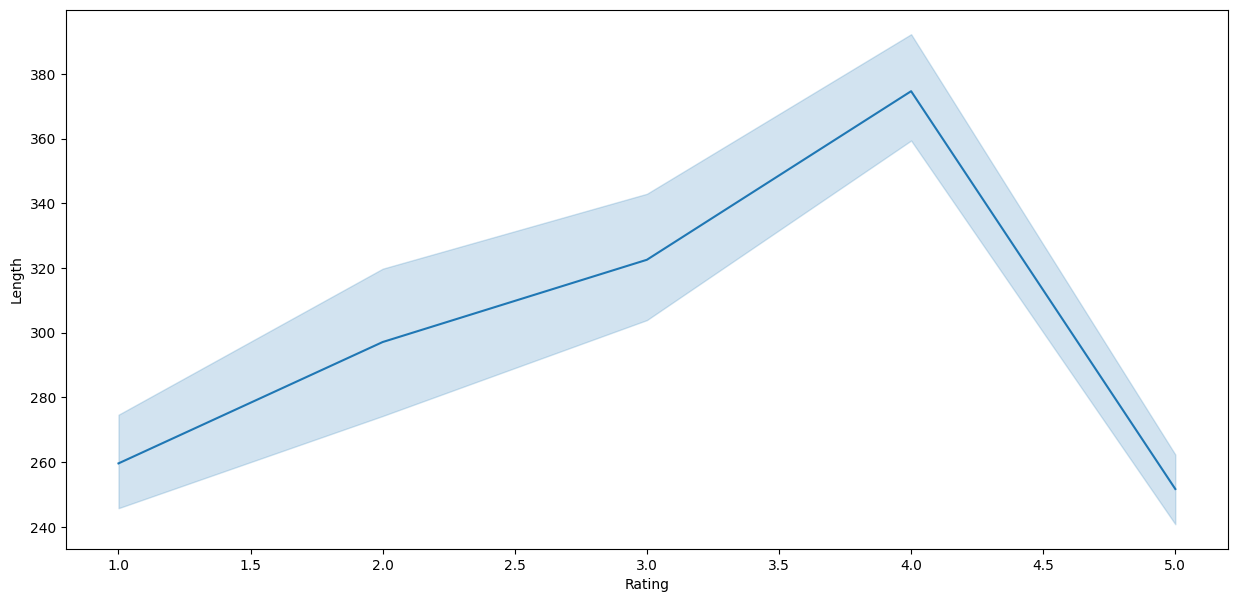

In [23]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df,x="Rating", y="Length")

In [24]:
df_5=df[df['Rating']==5]
df_1=df[df['Rating']==1]

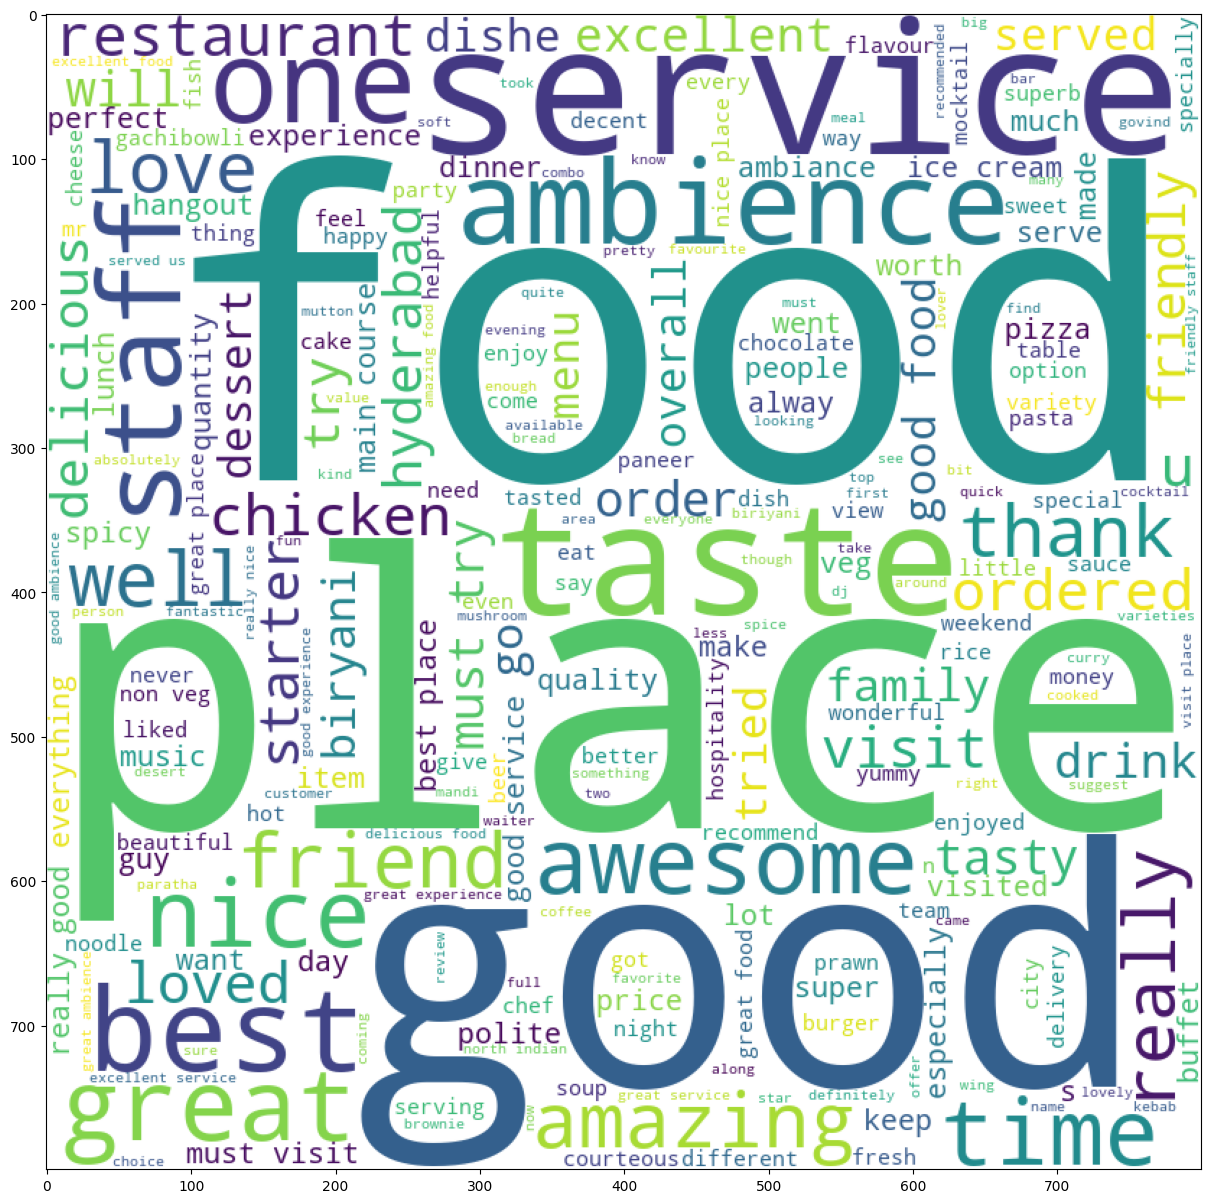

In [25]:
plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_5['Review']))

plt.imshow(wc1)

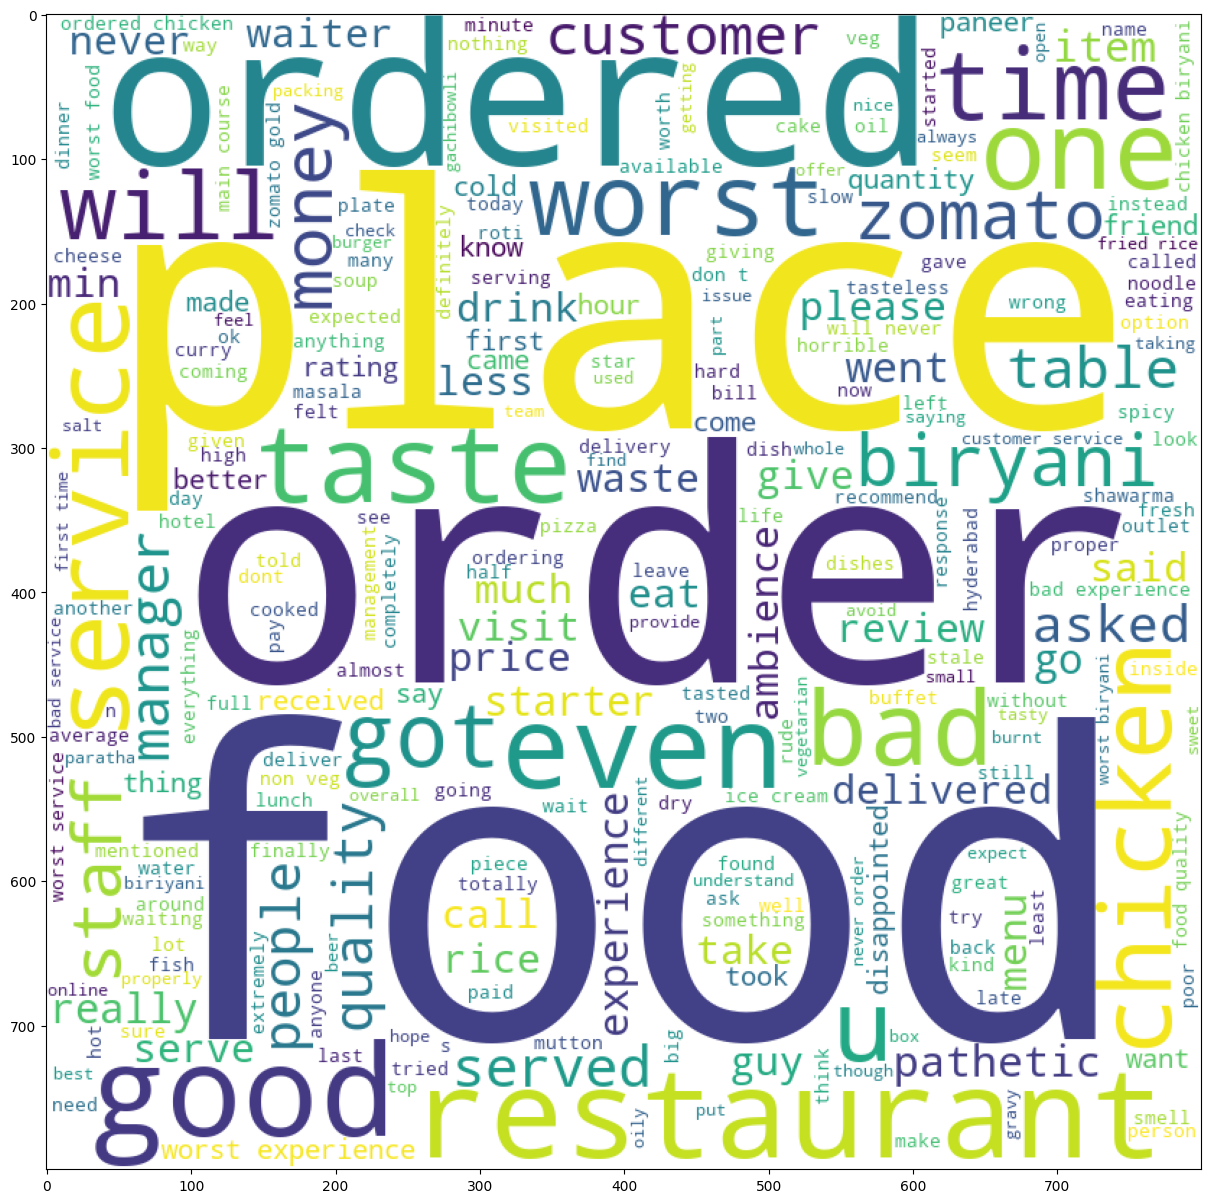

In [26]:
plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_1['Review']))

plt.imshow(wc2)

# 2- Making clean text for ML & TF

In [27]:
df.head()

,Review,Rating,Length
0,"the ambience was good, food was quite good . h...",5.0,222
1,ambience is too good for a pleasant evening. s...,5.0,144
2,a must try.. great food great ambience. thnx f...,5.0,189
3,soumen das and arun was a great guy. only beca...,5.0,148
4,food is good.we ordered kodi drumsticks and ba...,5.0,160


In [28]:
a=df.iloc[0,0]
a

'the ambience was good, food was quite good . had saturday lunch , which was cost effective .\ngood place for a sate brunch. one can also chill with friends and or parents.\nwaiter soumen das was really courteous and helpful.'

- First I want making clean the first review and I will make for loop or Function

In [48]:
!pip install nltk

  Using cached regex-2025.10.23-cp313-cp313-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 11.3 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
# import library for Natural Language Toolkit

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [30]:

a=re.sub('[^a-zA-Z0-9]',' ',a)
a=a.lower().split()
a

['the',
 'ambience',
 'was',
 'good',
 'food',
 'was',
 'quite',
 'good',
 'had',
 'saturday',
 'lunch',
 'which',
 'was',
 'cost',
 'effective',
 'good',
 'place',
 'for',
 'a',
 'sate',
 'brunch',
 'one',
 'can',
 'also',
 'chill',
 'with',
 'friends',
 'and',
 'or',
 'parents',
 'waiter',
 'soumen',
 'das',
 'was',
 'really',
 'courteous',
 'and',
 'helpful']

In [31]:
# dowmload the stopword from nlit library 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vamsi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
sw=set(stopwords.words('english'))
print(sw)

{"we'll", "mightn't", 'a', 'myself', 'with', 'not', 'their', "don't", 'hers', 'most', 'other', 't', 'himself', 'my', 'hasn', "that'll", 'll', 'aren', 'how', 'has', 'any', 'you', 'which', 'in', "mustn't", "you'd", 'am', 'more', 'what', 'further', 'were', 'did', 'just', 'o', 'after', 'as', 'whom', 'y', "you'll", 'up', "haven't", 'both', "hadn't", 'wasn', 'at', 'ma', "they'd", 'of', 'haven', 'me', "needn't", 'some', "they'll", "we'd", "you're", 'very', 'herself', 'same', 'yours', 'than', 'and', 'does', 'into', 'be', "i'll", 'or', 'we', 'above', "it'd", "wasn't", 'it', "won't", 'no', 'before', "couldn't", 'being', 'through', 'to', 'ain', 'over', "aren't", 'yourselves', 'd', 'do', 'shan', "doesn't", 'down', 'the', 'from', "he'd", 'been', "they've", 'now', 'needn', "weren't", 'only', 'themselves', 'but', 'your', 'if', 'during', 'below', 'her', 'shouldn', 'them', 'mustn', "isn't", 'by', 'each', 'our', 'who', 'until', 'so', 'for', 'all', 'she', "shouldn't", "it's", 'on', 'when', "she'll", "we'

In [33]:

clean_word=[i for i in a if not i in sw]
clean_word

['ambience',
 'good',
 'food',
 'quite',
 'good',
 'saturday',
 'lunch',
 'cost',
 'effective',
 'good',
 'place',
 'sate',
 'brunch',
 'one',
 'also',
 'chill',
 'friends',
 'parents',
 'waiter',
 'soumen',
 'das',
 'really',
 'courteous',
 'helpful']

In [34]:
sen=' '.join(clean_word)
sen

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful'

In [35]:

def text_preprocessing(a):
  a=re.sub('[^a-zA-Z]',' ',a)
  a=a.lower().split()
  ps=PorterStemmer()
  clean_word=[ps.stem(i) for i in a if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [36]:
df['clean_word']=df["Review"].apply(text_preprocessing)
df.head()

,Review,Rating,Length,clean_word
0,"the ambience was good, food was quite good . h...",5.0,222,ambienc good food quit good saturday lunch cos...
1,ambience is too good for a pleasant evening. s...,5.0,144,ambienc good pleasant even servic prompt food ...
2,a must try.. great food great ambience. thnx f...,5.0,189,must tri great food great ambienc thnx servic ...
3,soumen das and arun was a great guy. only beca...,5.0,148,soumen da arun great guy behavior sincereti go...
4,food is good.we ordered kodi drumsticks and ba...,5.0,160,food good order kodi drumstick basket mutton b...


In [37]:
df['Length 2'] = df['clean_word'].apply(len)
df.head()

,Review,Rating,Length,clean_word,Length 2
0,"the ambience was good, food was quite good . h...",5.0,222,ambienc good food quit good saturday lunch cos...,144
1,ambience is too good for a pleasant evening. s...,5.0,144,ambienc good pleasant even servic prompt food ...,84
2,a must try.. great food great ambience. thnx f...,5.0,189,must tri great food great ambienc thnx servic ...,124
3,soumen das and arun was a great guy. only beca...,5.0,148,soumen da arun great guy behavior sincereti go...,82
4,food is good.we ordered kodi drumsticks and ba...,5.0,160,food good order kodi drumstick basket mutton b...,105


In [38]:
df.describe().round(2)

,Rating,Length,Length 2
count,9363.00,9363.00,9363.00
mean,3.54,297.02,174.73
std,1.49,341.89,198.38
min,1.00,1.00,0.00
25%,2.00,149.00,90.00
50%,4.00,198.00,121.00
75%,5.00,334.00,194.00
max,5.00,5212.00,3363.00


# 3- Building a Machine Learning Model / classification


In [62]:
! pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 8.0 MB/s eta 0:00:09
   - -------------------------------------- 3.4/72.0 MB 12.4 MB/s eta 0:00:06
   -- ------------------------------------- 4.7/72.0 MB 11.4 MB/s eta 0:00:06
   --- ------------------------------------ 5.8/72.0 MB 8.1 MB/s eta 0:00:09
   --- ------------------------------------ 7.1/72.0 MB 7.8 MB/s eta 0:00:09
   ---- ----------------------------------- 8.7/72.0 MB 7.7 MB/s eta 0:00:09
   ----- ---------------------------------- 10.2/72.0 MB 7.7 MB/s eta 0:00:09
   ------ --------------------------------- 11.5/72.0 MB 7.7 MB/s eta 0:00:08
   ------- -------------------------------- 13.1/72.0 MB 7.7 MB/s eta 0:00:08
   -------- ------------------------------- 14.7/72.0 MB 7.7 MB/s eta 0:00:08
   --------- ------------------------------ 16.5/72.0 MB 7.7 MB/s eta 0:00:08
   ---------- ----------------------------- 18.1/72.0 MB 7.7 MB/s eta 0:00:0


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
#Importing the basic librarires for building model - classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.preprocessing import LabelEncoder,StandardScaler


In [40]:

cv=CountVectorizer()
X=cv.fit_transform(df["clean_word"]).toarray()
y=df["Rating"]

In [41]:

print("X shape: ", X.shape)
print("y: shape ", y.shape)

X shape:  (9363, 10772)
y: shape  (9363,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (7022, 10772)
X Test  :  (2341, 10772)
Y Train :  (7022,)
Y Test  :  (2341,)


In [43]:
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()


In [44]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

results = {}

for name, model in models:
    model.fit(X_train, y_train.astype(int))  # ensure labels are integers
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test.astype(int), y_pred) * 100
    print(f"{name}: {acc:.2f}%")
    results[name] = acc

Logistic Regression: 59.93%
Decision Tree: 49.55%
Random Forest: 58.27%
KNN: 44.60%


c:\Users\vamsi\Downloads\Restaurant aspect based sentiment analysis\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [01:21:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: 60.06%


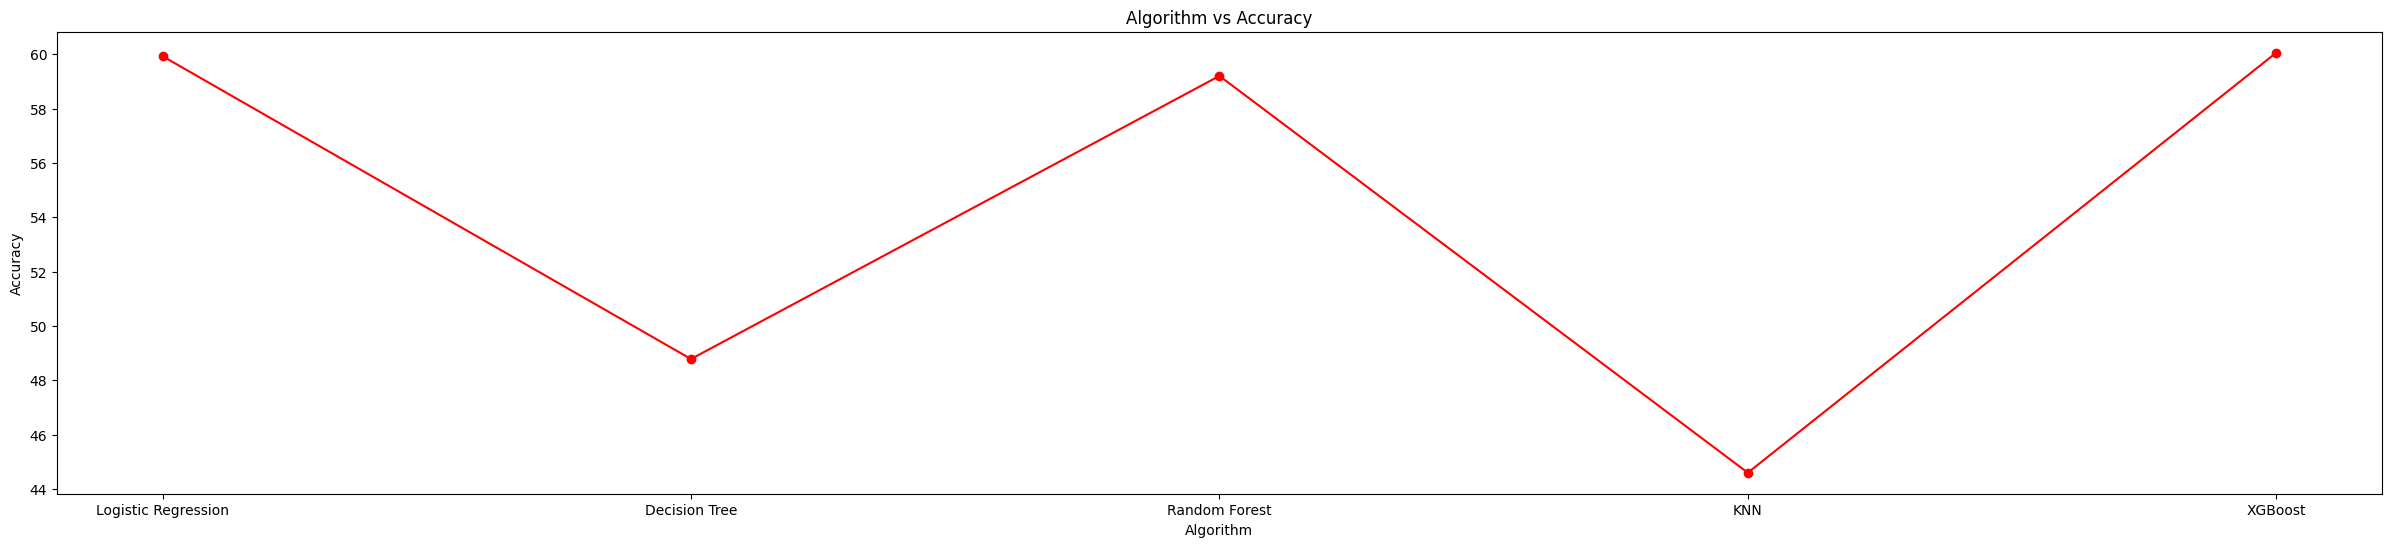

In [75]:
# make graph about Accuracy

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(results.keys(),results.values(),marker='o',color='red')
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression
import joblib
import os

# Make sure the folder exists
folder_path = "C:/Users/vamsi/Downloads/Restaurant aspect based sentiment analysis/models/"
os.makedirs(folder_path, exist_ok=True)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)  # use your training data

# Save the trained model
file_path = os.path.join(folder_path, "LogisticRegression.joblib")
joblib.dump(model, file_path)
print("Model saved successfully!")


Model saved successfully!


In [ ]:
loaded_model = joblib.load(file_path)
pred=loaded_model.predict(X_test)

59.931653139683895

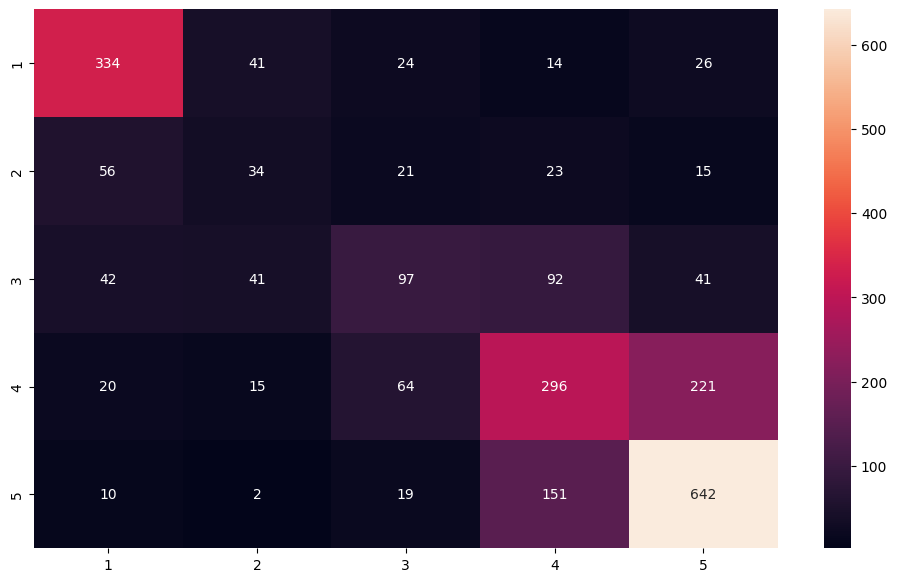

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
labels = ['1', '2', '3', '4', '5']
conf = confusion_matrix(y_test, pred)

cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()